In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

type: <class 'numpy.ndarray'>
Shape: (768, 1366, 3)


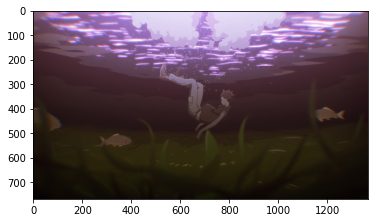

In [8]:
path = os.path.join('assets','shoto.png')
image = cv2.imread(path)
print(f'type: {type(image)}')
print(f'Shape: {image.shape}')
#BGR
plt.imshow(image)

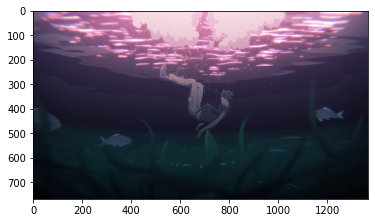

In [9]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#RGB
plt.imshow(image)

In [17]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [13]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
print(modified_image.shape)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
print(f"Reshaped: {modified_image.shape}")

(400, 600, 3)
Reshaped: (240000, 3)


In [29]:
num_colors = 5
clusters = KMeans(n_clusters = num_colors)
labels = clusters.fit_predict(modified_image)
print(labels)

[2 2 2 ... 4 4 4]


Counter({4: 110161, 0: 54084, 2: 29727, 3: 24610, 1: 21418})
[[ 41.50744559  38.49632339  62.37872741]
 [183.68017366 116.35544559 158.04467579]
 [103.70160748  77.69562147 109.45443234]
 [236.54463052 196.76412487 218.10564182]
 [ 13.8620079   24.88106071  34.02956909]]


([<matplotlib.patches.Wedge at 0x7f60405ae040>,
 [Text(1.0177652939109578, 0.4173173930120119, '#ecc4da'),
  Text(0.5390906888824081, 0.9588436938105662, '#b7749e'),
  Text(-0.0992178467505157, 1.0955162339674347, '#29263e'),
  Text(-0.9903130642808851, 0.4788319483019109, '#674d6d'),
  Text(0.14128015461328436, -1.090889507655311, '#0d1822')])

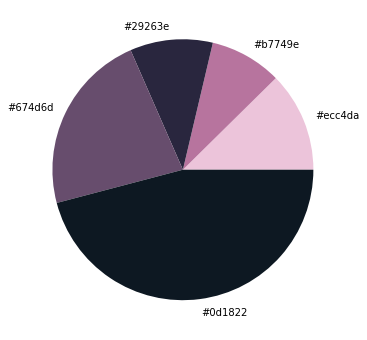

In [30]:
counts = Counter(labels)
print(counts)

center_colors = clusters.cluster_centers_
print(center_colors)

# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]

hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)